In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

In [8]:
# load the california housing dataset
# output is numpy array
data = fetch_california_housing()
x, y = data.data, data.target
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Exercise 1: How many observations and features does the dataset have?

In [12]:
n_oberservations, n_features = x.shape
x.shape

(20640, 8)

## Initialize Models

In [13]:
n = 100
rf = RandomForestRegressor(n_estimators = n, random_state = 42)
xgb = XGBRegressor(n_estimators = n, random_state = 42)

In [14]:
# Fit Models
# measure training time for Random Forest
start_time_rf = time.time()
rf.fit(x_train, y_train)
end_time_rf = time.time()
rf_train_time = end_time_rf - start_time_rf
# measure training time for XGBoost
start_time_xgb = time.time()
xgb.fit(x_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb - start_time_xgb

## Exercsie 2: Use the fitted models to make predictions on the test set

In [15]:
# measure predict time for Random Forest
start_time_rf = time.time()
y_hat_rf = rf.predict(x_test)
end_time_rf = time.time()
rf_predict_time = end_time_rf - start_time_rf
# measure predict time for xgb
start_time_xgb = time.time()
y_hat_xgb = xgb.predict(x_test)
end_time_xgb = time.time()
xgb_predict_time = end_time_xgb - start_time_xgb

## Exercise 3: Calculate the MSE and R2 values for both models

In [16]:
mse_rf = mean_squared_error(y_test, y_hat_rf)
mse_xgb = mean_squared_error(y_test, y_hat_xgb)
r2_rf = r2_score(y_test, y_hat_rf)
r2_xgb = r2_score(y_test, y_hat_xgb)

## Exercise 4: Print the MSR and R2 value for both models

In [17]:
print(f'Random Forest: MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'XGBoost: MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')

Random Forest: MSE = 0.2554, R^2 = 0.8051
XGBoost: MSE = 0.2226, R^2 = 0.8301


## Exercise 5: Print the timings for each model

In [19]:
print(f'Random Forest: Training Time = {rf_train_time:.4f}, Testing Time = {rf_predict_time:.4f}')
print(f'XGBoost: Training Time = {xgb_train_time:.4f}, Testing Time = {xgb_predict_time:.4f}')

Random Forest: Training Time = 21.9026, Testing Time = 0.1612
XGBoost: Training Time = 0.4176, Testing Time = 0.0040


## Exercise 6: Calculate the standard deviation of the test data

In [21]:
std_y = np.std(y_test)
std_y

np.float64(1.1447309632576992)

## Visualizing the results

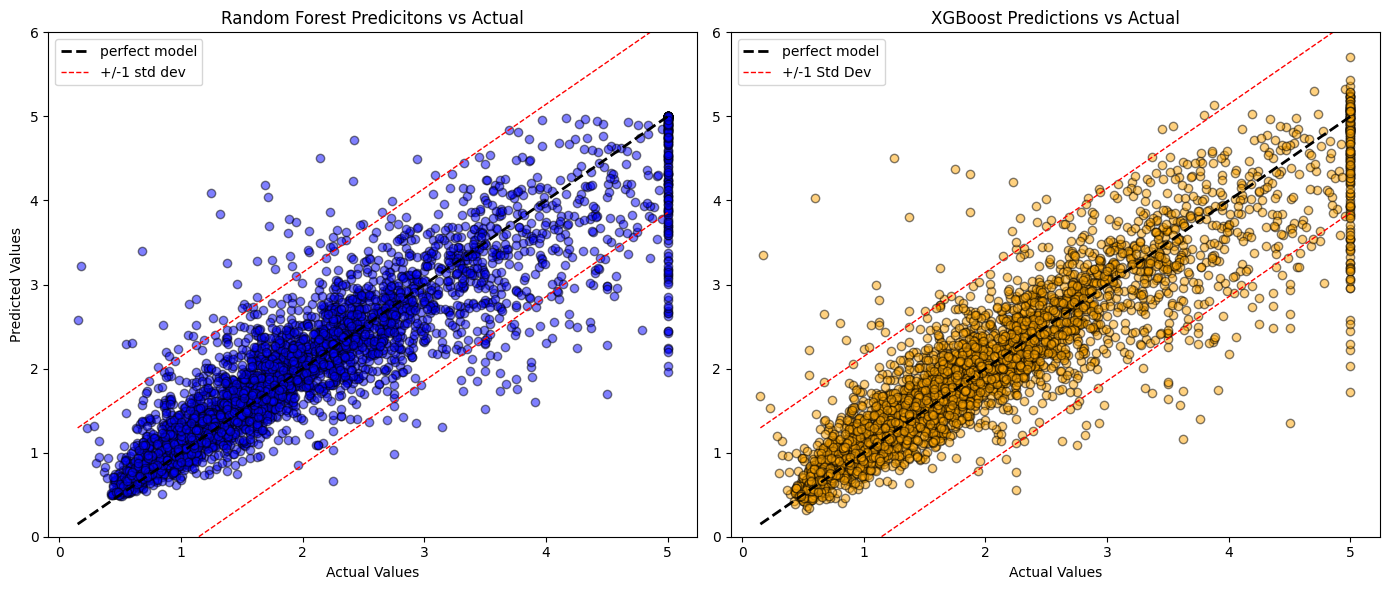

In [27]:
plt.figure(figsize = (14, 6))
# plotting random forest model
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_hat_rf, alpha = 0.5, color = 'blue', ec = 'k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2, label = 'perfect model')
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw = 1, label = '+/-1 std dev')
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw = 1)
plt.ylim(0, 6)
plt.title('Random Forest Predicitons vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
# plotting xgboost model
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_hat_xgb, alpha=0.5, color="orange",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()